<img src="https://imgur.com/3Ua9VYU.png" style="float: left; margin: 18px; height: 75px"> 

# Ames Housing Data and Kaggle Challenge
---


### Imports & Reading Data

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.pipeline import Pipeline


In [14]:
df=pd.read_csv('../datasets/train.csv')
ah_test=pd.read_csv('../datasets/test.csv')

### Glance at Data

In [15]:
pd.set_option('display.max_columns', 100) #columns overload!
pd.set_option('display.max_rows', 100)

In [16]:
variableSummary = []
for var in df.columns:
    variableSummary.append({
        'Variable': var,
        'Type': df[var].dtype,
        'Count': df[var].count(),
        'UniqueValues':len(df[var].unique()),
        'Unique/Count Ratio':len(df[var].unique())/df[var].count(),
        'Count of NaN': df[var].isna().sum(),
        'Percentage NaN': df[var].isna().sum() *100 /len(df[var]),
    })
vs=pd.DataFrame(variableSummary)
vs

,Variable,Type,Count,UniqueValues,Unique/Count Ratio,Count of NaN,Percentage NaN
0,Id,int64,2051,2051,1.000000,0,0.000000
1,PID,int64,2051,2051,1.000000,0,0.000000
2,MS SubClass,int64,2051,16,0.007801,0,0.000000
3,MS Zoning,object,2051,7,0.003413,0,0.000000
4,Lot Frontage,float64,1721,119,0.069146,330,16.089712
5,Lot Area,int64,2051,1476,0.719649,0,0.000000
6,Street,object,2051,2,0.000975,0,0.000000
7,Alley,object,140,3,0.021429,1911,93.174061
8,Lot Shape,object,2051,4,0.001950,0,0.000000
9,Land Contour,object,2051,4,0.001950,0,0.000000


In [17]:
ah_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [18]:
vssort=vs.sort_values(by='Percentage NaN',ascending=False).head(10)

''

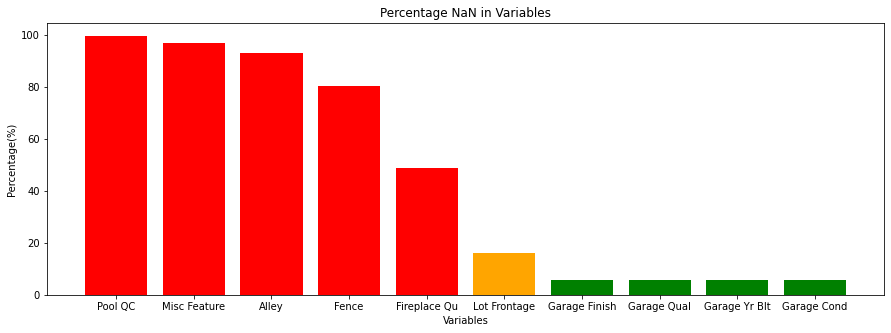

In [19]:
plt.figure(figsize=(15,5))
plt.bar(vssort['Variable'],vssort['Percentage NaN'],color=['Red','Red','Red','Red','Red','Orange','Green','Green','Green','Green'])
plt.title('Percentage NaN in Variables')
plt.xlabel('Variables')
plt.ylabel('Percentage(%)')
;

In [20]:
# plt.figure(figsize=(30,20))
# sns.heatmap(ah_train.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1);

In [21]:
over30percentnan=['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu']
alwaysremoved=['PID']

continuous= ['Lot_Frontage', 'Lot_Area', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 
             'Bsmt_Unf_SF', 'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 
             'Gr_Liv_Area', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 
             '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val']

discrete= ['Id','Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath','Yr_Sold','Year_Remod/Add',
                'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr','Fireplaces','Mo_Sold']

categorical=['Street', 'Land_Contour', 'Lot_Config','Bldg_Type', 'House_Style', 'Roof_Style',
             'Mas_Vnr_Type','Central_Air', 'Overall_Qual', 'BsmtFin_Type_2','Paved_Drive']

corr80=['Garage_Yr_Blt','TotRms_AbvGrd','Garage_Cars','Year_Built']

In [22]:
contdiscat=continuous+discrete+categorical

In [23]:
numeric=continuous+discrete

### Data Cleaning

In [24]:
ah_train.columns=ah_train.columns.str.replace(' ','_')
ah_test.columns=ah_test.columns.str.replace(' ','_')

In [25]:
ah_train.drop(columns=over30percentnan,inplace=True) #dropped columns with over 30% NaN
ah_train.drop(columns=alwaysremoved,inplace=True) #dropped Id and PID
ah_train.drop(columns=corr80,inplace=True) #dropped less usable variables with high correlation

In [26]:
ah_train2=pd.concat([ah_train[numeric],ah_train[categorical]],axis=1)

## Fitting and Splitting

In [27]:
X=ah_train[contdiscat]
y=ah_train['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2022)

## Preprocessing

In [28]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean"))]
)

categorical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy='most_frequent')),
                                          ('onehot',OneHotEncoder(handle_unknown='error',drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric),
         ("cat", categorical_transformer, categorical),
    ]
)


In [29]:
X_train_transformed=preprocessor.fit_transform(X_train)
categoricalcol=list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names())
X_train=pd.DataFrame(X_train_transformed,columns=list(X_train[numeric].columns)+categoricalcol)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Model

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)

# lr.fit(X_ct_test,y_test)
r2_train=lr.score(X_train,y_train)

print(f'Training R2 = {r2_train}')

Training R2 = 0.8692355659144568


## Evaluation

In [31]:
cross_val_score(lr, X_train, y_train).mean()

0.8075938301675375

In [32]:
lr.intercept_

16560077.145470284

In [33]:
lr.coef_

array([-3.25332596e+01,  4.07078608e-01,  2.81189201e+01,  7.58351172e+00,
        9.25149416e-01, -2.40898551e+00,  6.09967094e+00,  1.43212119e+01,
        2.09511651e+01, -1.09326863e+01,  2.43396873e+01,  2.41837120e+01,
        1.70917647e+01,  3.38203173e+00, -1.09702418e-01,  5.91471629e+01,
        7.36187081e+01, -1.03098896e+02, -1.15574007e+01, -1.28875370e+01,
        8.69536465e+03, -1.02285638e+03,  1.11444213e+04, -8.68095939e+03,
        4.23823106e+02,  7.93431897e+03,  2.26493089e+02, -1.08348152e+04,
        5.78331142e+03,  4.05742439e+01,  9.02095084e+03,  2.76806352e+04,
        2.08420132e+04,  1.13901985e+04,  7.40301074e+03, -3.16998397e+03,
       -1.05309587e+04,  1.38075478e+03, -8.46473909e+03, -1.29839644e+04,
       -2.37371497e+04, -1.69607420e+04,  1.22710962e+04,  1.34644154e+04,
       -1.14055272e+04, -8.57537347e+03, -3.96691712e+03,  1.84610128e+04,
        5.46195700e+03, -1.93194923e+03, -4.59046074e+03,  2.45780364e+03,
       -5.86500663e+04, -

In [34]:
list(zip(X.columns,lr.coef_))

[('Lot_Frontage', -32.5332595686269),
 ('Lot_Area', 0.4070786081686766),
 ('Mas_Vnr_Area', 28.1189200862638),
 ('BsmtFin_SF_1', 7.583511717395414),
 ('BsmtFin_SF_2', 0.9251494163909513),
 ('Bsmt_Unf_SF', -2.40898551072015),
 ('Total_Bsmt_SF', 6.0996709438750685),
 ('1st_Flr_SF', 14.321211857255236),
 ('2nd_Flr_SF', 20.951165083703984),
 ('Low_Qual_Fin_SF', -10.932686286484227),
 ('Gr_Liv_Area', 24.339687331779672),
 ('Garage_Area', 24.183712029693723),
 ('Wood_Deck_SF', 17.0917646862398),
 ('Open_Porch_SF', 3.382031733394683),
 ('Enclosed_Porch', -0.10970241768552569),
 ('3Ssn_Porch', 59.14716289064681),
 ('Screen_Porch', 73.61870814387635),
 ('Pool_Area', -103.09889620748481),
 ('Misc_Val', -11.557400666603257),
 ('Id', -12.887537035295054),
 ('Bsmt_Full_Bath', 8695.364645525897),
 ('Bsmt_Half_Bath', -1022.8563766366642),
 ('Full_Bath', 11144.421299767993),
 ('Yr_Sold', -8680.9593936696),
 ('Year_Remod/Add', 423.8231060608246),
 ('Half_Bath', 7934.318965803624),
 ('Bedroom_AbvGr', 226

In [35]:
y_hat = lr.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, y_hat))

28407.843590581822

## Test check

In [36]:
X_test_transformed=preprocessor.fit_transform(X_test)
categoricalcol=list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names())
X_test=pd.DataFrame(X_test_transformed,columns=list(X_test[numeric].columns)+categoricalcol)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
r2_test=lr.score(X_test,y_test)
print(f'Testing R2 = {r2_test}')

Testing R2 = 0.8714036404688512


In [38]:
y_hat = lr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_hat))

29134.37343833401

## Testing Dataset

In [39]:
ah_test_transformed=preprocessor.fit_transform(ah_test)
categoricalcol=list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names())
ah_test=pd.DataFrame(ah_test_transformed,columns=list(ah_test[numeric].columns)+categoricalcol)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
preds = lr.predict(ah_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x6_CBlock
Feature names seen at fit time, yet now missing:
- x8_2

  warnings.warn(message, FutureWarning)


In [41]:
ah_test['SalePrice'] = preds

In [42]:
ah_test['Id']=ah_test['Id'].astype(int)

In [43]:
lr_submission = ah_test[['Id', 'SalePrice']]
lr_submission.set_index('Id', inplace=True) 
lr_submission.to_csv('pipecol_simp_oh_submission.csv') 